Import Module

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load dataset CIFAR10 ###

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

Training sample : 50000, Each sample : 32 x 32 image, 3 rgb channels

In [4]:
X_test.shape

(10000, 32, 32, 3)

Test sample : 10000, each sample : 32 x 32 image, 3 rgb channels

In [11]:
y_train.shape

(50000, 1)

50000 sample, 1 dimensional array

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

example : first array [6] = frog. From source : https://www.cs.toronto.edu/~kriz/cifar.html
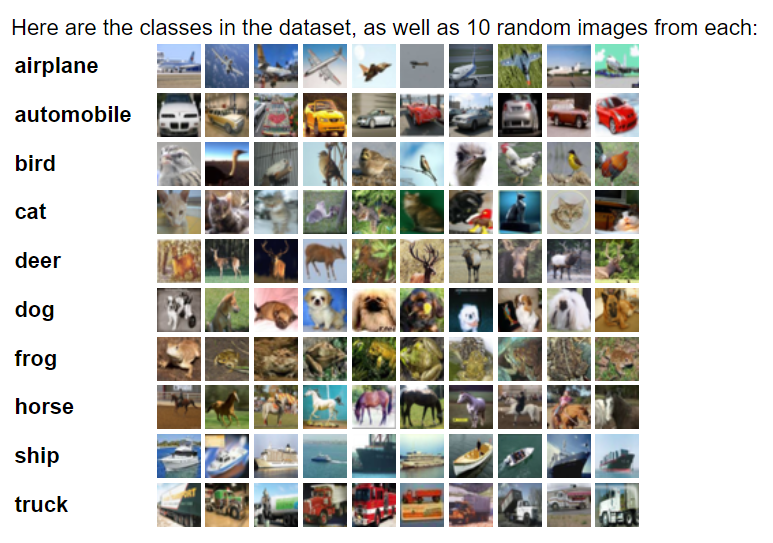

In [14]:
y_train = y_train.reshape(-1,)  #reshape
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

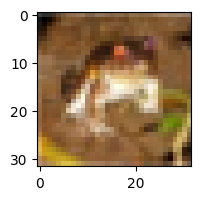

In [8]:
# test for showing the data
plt.figure(figsize = (15,2))  # setting the display image size
plt.imshow(X_train[0]) # show the data [0]

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classes[9] #try call the 9 class, it should be truck

'truck'

In [18]:
# plot some images to see what they are

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

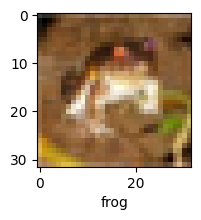

In [19]:
plot_sample(X_train, y_train, 0)

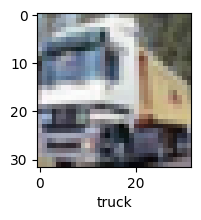

In [20]:
plot_sample(X_train, y_train, 1)

Normalize images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Then we need to normalize in 0-->1 range, by divide it by 255

### Normalize training data ###

In [21]:
# normalize data
# divide each value by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

### Build ANN ###

In [22]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),  # flatten the layer
        layers.Dense(3000, activation='relu'),  # two deep layers, first have 3000 neurons with Relu activation
        layers.Dense(1000, activation='relu'),  # second deep layers have 1000 neurons with Relu activation
        layers.Dense(10, activation='sigmoid')  # other layer has 10 categories with sigmoid activation
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 134s 85ms/step - loss: 1.8121 - accuracy: 0.3512
Epoch 2/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6263 - accuracy: 0.4243
Epoch 3/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.5434 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.4825 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4298 - accuracy: 0.4965


In [24]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.4618 - accuracy: 0.4766


[1.461817741394043, 0.4765999913215637]

ANN performing really bad on the datasets with 5 epochs with accuracy around 0.49 = 49%

In [26]:
# detailed report

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.50      0.52      1000
           1       0.64      0.57      0.60      1000
           2       0.39      0.29      0.33      1000
           3       0.35      0.35      0.35      1000
           4       0.49      0.24      0.33      1000
           5       0.48      0.29      0.36      1000
           6       0.37      0.80      0.50      1000
           7       0.72      0.40      0.51      1000
           8       0.50      0.74      0.59      1000
           9       0.52      0.59      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



### Build with CNN ###

In [27]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # for normalize probability using softmax
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4568 - accuracy: 0.4737
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0919 - accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9585 - accuracy: 0.6658
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8720 - accuracy: 0.6983
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8043 - accuracy: 0.7198
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7495 - accuracy: 0.7401
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7011 - accuracy: 0.7564
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6565 - accuracy: 0.7728
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6171 - accuracy: 0.7836
Epoch 10/10
1563/1563 [==============================] - 52s 33m

CNN accuracy more better than ANN, it has 70% accuracy



In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9146 - accuracy: 0.7048


[0.9145992994308472, 0.704800009727478]

In [33]:
# plotting some samples
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[5.5885711e-04, 3.2059594e-05, 8.9365087e-04, 9.5235169e-01,
        3.1158523e-04, 4.4319585e-02, 1.9422507e-04, 8.9468487e-04,
        4.3977809e-04, 3.9182414e-06],
       [3.2522503e-04, 2.1315338e-01, 7.9473216e-07, 8.7898719e-09,
        1.6220683e-10, 2.0741793e-09, 3.4195032e-12, 1.2932035e-10,
        7.8638482e-01, 1.3580566e-04],
       [2.3794121e-01, 2.4018139e-01, 3.0622429e-03, 1.2334292e-02,
        3.1351895e-04, 1.3872454e-03, 3.1014127e-04, 5.0357250e-03,
        4.6961716e-01, 2.9817136e-02],
       [9.7121531e-01, 3.5816195e-04, 2.2000626e-02, 1.4429253e-04,
        3.6394948e-03, 2.2148626e-05, 9.7899967e-05, 3.2042842e-06,
        2.4641065e-03, 5.4751603e-05],
       [5.4899365e-06, 3.6590973e-05, 4.1453458e-02, 2.0655401e-02,
        4.5582938e-01, 4.4474299e-03, 4.7748396e-01, 7.4312033e-05,
        1.0572567e-05, 3.4187347e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [38]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'airplane'

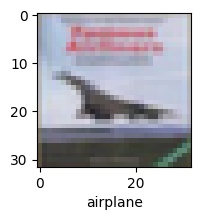

In [41]:
plot_sample(X_test, y_test,3)
classes[y_classes[3]]

'frog'

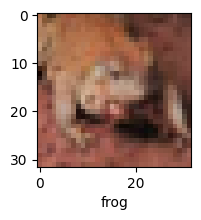

In [42]:
plot_sample(X_test, y_test,5)
classes[y_classes[5]]


*   ANN Accuracy : 49%
*   CNN Accuracy : 70%



## Done ##